# **Data Analysis Project: Brazilian E-Commerce**

## **Business Questions**
- Bagaimana performa penjualan produk selama satu tahun terakhir?
- Bagaimana lama waktu pengiriman yang dibutuhkan sampai dengan produk diterima customer selama setahun terakhir?


## **Library Preparation**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## **Data Wrangling**

### **Gathering Data**

In [ ]:
customers_dataset = pd.read_csv('/content/drive/MyDrive/Project Submission Dicoding - IDCamp/Belajar Analisis Data dengan Python/Dataset/customers_dataset.csv')
customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
geolocation_dataset = pd.read_csv('/content/drive/MyDrive/Project Submission Dicoding - IDCamp/Belajar Analisis Data dengan Python/Dataset/geolocation_dataset.csv')
geolocation_dataset.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
order_items_dataset = pd.read_csv('/content/drive/MyDrive/Project Submission Dicoding - IDCamp/Belajar Analisis Data dengan Python/Dataset/order_items_dataset.csv')
order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order_payments_dataset = pd.read_csv('/content/drive/MyDrive/Project Submission Dicoding - IDCamp/Belajar Analisis Data dengan Python/Dataset/order_payments_dataset.csv')
order_payments_dataset.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
order_reviews_dataset = pd.read_csv('/content/drive/MyDrive/Project Submission Dicoding - IDCamp/Belajar Analisis Data dengan Python/Dataset/order_reviews_dataset.csv')
order_reviews_dataset.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
orders_dataset = pd.read_csv('/content/drive/MyDrive/Project Submission Dicoding - IDCamp/Belajar Analisis Data dengan Python/Dataset/orders_dataset.csv')
orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
products_dataset = pd.read_csv('/content/drive/MyDrive/Project Submission Dicoding - IDCamp/Belajar Analisis Data dengan Python/Dataset/products_dataset.csv')
products_dataset.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
sellers_dataset = pd.read_csv('/content/drive/MyDrive/Project Submission Dicoding - IDCamp/Belajar Analisis Data dengan Python/Dataset/sellers_dataset.csv')
sellers_dataset.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
product_category_name_translation = pd.read_csv('/content/drive/MyDrive/Project Submission Dicoding - IDCamp/Belajar Analisis Data dengan Python/Dataset/product_category_name_translation.csv')
product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### **Data Assessment**

#### **Assess the `customers_dataset` table**

In [ ]:
customers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
# @title
customers_dataset.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [ ]:
print('Number of duplicate data: ', customers_dataset.duplicated().sum())

Number of duplicate data:  0


In [ ]:
customers_dataset.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


No missing values, duplicate data, inaccurate values, and incorrect data types were found.

#### **Assess the `geolocation_dataset` table**

In [ ]:
geolocation_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [ ]:
geolocation_dataset.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [ ]:
print('Number of duplicate data: ', geolocation_dataset.duplicated().sum())

Number of duplicate data:  261831


In [ ]:
geolocation_dataset.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


No missing values, duplicate data (`261831 rows`), no inaccurate values, and no incorrect data types were found.

#### **Assess the `order_items_dataset` table**

In [ ]:
order_items_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
order_items_dataset.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [ ]:
print('Number of duplicate data: ', order_items_dataset.duplicated().sum())

Number of duplicate data:  0


In [ ]:
order_items_dataset.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


No missing values, no duplicate data, no inaccurate values, and incorrect data types (`shipping_limit_date`) were found.

#### **Assess the `order_payments_dataset` table**

In [ ]:
order_payments_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
order_payments_dataset.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [ ]:
print('Number of duplicate data: ', order_payments_dataset.duplicated().sum())

Number of duplicate data:  0


In [ ]:
order_payments_dataset.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


No missing values, duplicate data, inaccurate values, and incorrect data types were found.

#### **Assess the `order_reviews_dataset` table**

In [ ]:
order_reviews_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
order_reviews_dataset.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [ ]:
print('Number of duplicate data: ', order_reviews_dataset.duplicated().sum())

Number of duplicate data:  0


In [ ]:
order_reviews_dataset.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Missing values (`review_comment_title, review_comment_message`), no duplicate data, no inaccurate values, and incorrect data types (`review_creation_date, review_answer_timestamp`) were found.

#### **Menilai tabel `orders_dataset` table**

In [ ]:
orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
orders_dataset.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
print("Number of duplicate data: ", orders_dataset.duplicated().sum())

Number of duplicate data:  0


In [ ]:
orders_dataset.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Missing values (`order_approved_at, order_delivered_carrier_date, order_delivered_customer_date`), no duplicate data, no inaccurate values, and incorrect data types (`order_purchase_timestamp,order_approved_at,  order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date`) were found.

#### **Assess the `products_dataset` table**

In [ ]:
products_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
products_dataset.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
print('Number of duplicate data: ', products_dataset.duplicated().sum())

Number of duplicate data:  0


In [ ]:
products_dataset.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Missing values (`product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g,product_length_cm, product_height_cm, product_width_cm`), no duplicate data, no inaccurate values, and no incorrect data types were found.

#### **Assess the `sellers_dataset` table**

In [ ]:
sellers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
sellers_dataset.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [ ]:
print('Number of duplicate data: ', sellers_dataset.duplicated().sum())

Number of duplicate data:  0


In [ ]:
sellers_dataset.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


No missing values, duplicate data, inaccurate values, and incorrect data types were found.

#### **Assess the `product_category_name_translation` table**

In [ ]:
product_category_name_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
product_category_name_translation.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [ ]:
print('Number of duplicate data: ', products_dataset.duplicated().sum())

Number of duplicate data:  0


In [ ]:
product_category_name_translation.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


No missing values, duplicate data, inaccurate values, and incorrect data types were found.

### **Summary of Data Assessment Results**

| Table Name                           | Duplicate Data | Missing Values | Inaccurate Values | Incorrect Data Type |
| ------------------------------------ | --------------- | --------------- | ------------------ | -------------------- |
| customers_dataset                    | No              | No              | No                 | No                   |
| geolocation_dataset                  | Yes             | No              | No                 | No                   |
| order_items_dataset                  | No              | No              | No                 | Yes                  |
| order_payments_dataset                | No              | No              | No                 | No                   |
| order_reviews_dataset                 | No              | Yes              | No                 | Yes                  |
| orders_dataset                        | No              | Yes             | No                 | Yes                  |
| products_dataset                      | No              | Yes             | No                 | No                   |
| sellers_dataset                       | No              | No              | No                 | No                   |
| product_category_name_translation     | No              | No              | No                 | No                   |


### **Cleaning Data**

#### **Cleaning the `geolocation_dataset` table**

##### **Duplicate Data**

In [ ]:
geolocation_dataset.duplicated().sum()

261831

In [ ]:
geolocation_dataset[geolocation_dataset.duplicated()].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP


In [ ]:
geolocation_dataset.drop_duplicates(inplace=True)

In [ ]:
print('Number of duplicate data: ', geolocation_dataset.duplicated().sum())

Number of duplicate data:  0


#### **Cleaning the `order_items_dataset` table**

##### **Incorrect Data Type**

In [ ]:
order_items_dataset.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [ ]:
datetime_columns = ['shipping_limit_date']

for column in datetime_columns:
  order_items_dataset[column] = pd.to_datetime(order_items_dataset[column])

In [ ]:
order_items_dataset.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

#### **Cleaning the `order_reviews_dataset` table**

##### **Incorrect Data Type**

In [ ]:
order_reviews_dataset.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
order_reviews_dataset.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [ ]:
datetime_columns = ['review_creation_date','review_answer_timestamp']

for column in datetime_columns:
  order_reviews_dataset[column] = pd.to_datetime(order_reviews_dataset[column])

In [ ]:
order_reviews_dataset.dtypes

review_id                          object
order_id                           object
review_score                        int64
review_comment_title               object
review_comment_message             object
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object

##### **Missing Value**

In [ ]:
order_reviews_dataset.shape

(99224, 7)

In [ ]:
order_reviews_dataset.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [ ]:
order_reviews_dataset[order_reviews_dataset.review_comment_title.isna()].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [ ]:
order_reviews_dataset.review_comment_title.fillna(value='Untitled', inplace=True)

In [ ]:
order_reviews_dataset[order_reviews_dataset.review_comment_message.isna()].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,Untitled,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,Untitled,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,Untitled,NaN,2018-02-17,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,Untitled,NaN,2018-04-13,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,Untitled,NaN,2017-07-16,2017-07-18 19:30:34


In [ ]:
order_reviews_dataset.review_comment_message.fillna(value='No comment', inplace=True)

In [ ]:
order_reviews_dataset.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [ ]:
order_reviews_dataset.shape

(99224, 7)

#### **Cleaning the `orders_dataset` table**

##### **Incorrect Data Type**

In [ ]:
orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
orders_dataset.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [ ]:
datetime_columns = ['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for column in datetime_columns:
  orders_dataset[column] = pd.to_datetime(orders_dataset[column])

In [ ]:
orders_dataset.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

##### **Missing Value**

In [ ]:
orders_dataset.shape

(99441, 8)

In [ ]:
orders_dataset.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
missing_value_percentage = (orders_dataset.isna().sum() / len(orders_dataset)) * 100
print(missing_value_percentage.round(2))

order_id                         0.00
customer_id                      0.00
order_status                     0.00
order_purchase_timestamp         0.00
order_approved_at                0.16
order_delivered_carrier_date     1.79
order_delivered_customer_date    2.98
order_estimated_delivery_date    0.00
dtype: float64


In [ ]:
orders_dataset[orders_dataset.order_approved_at.isna()].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30


In [ ]:
orders_dataset[orders_dataset.order_delivered_carrier_date.isna()].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09


In [ ]:
orders_dataset[orders_dataset.order_delivered_customer_date.isna()].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07


In [ ]:
orders_dataset.dropna(inplace=True)

In [ ]:
orders_dataset.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [ ]:
orders_dataset.shape

(96461, 8)

#### **Cleaning `products_dataset` table**

##### **Missing Value**

In [ ]:
products_dataset.shape

(32951, 9)

In [ ]:
products_dataset.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
missing_value_percentage = (products_dataset.isna().sum() / len(products_dataset)) * 100
print(missing_value_percentage.round(2))

product_id                    0.00
product_category_name         1.85
product_name_lenght           1.85
product_description_lenght    1.85
product_photos_qty            1.85
product_weight_g              0.01
product_length_cm             0.01
product_height_cm             0.01
product_width_cm              0.01
dtype: float64


In [ ]:
products_dataset[products_dataset.product_category_name.isna()].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0


In [ ]:
products_dataset[products_dataset.product_name_lenght.isna()].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0


In [ ]:
products_dataset[products_dataset.product_description_lenght.isna()].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0


In [ ]:
products_dataset[products_dataset.product_photos_qty.isna()].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0


In [ ]:
products_dataset[products_dataset.product_weight_g.isna()].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
products_dataset[products_dataset.product_length_cm.isna()].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
products_dataset[products_dataset.product_height_cm.isna()].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
products_dataset[products_dataset.product_width_cm.isna()].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
products_dataset.dropna(inplace=True)

In [ ]:
products_dataset.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [ ]:
products_dataset.shape

(32340, 9)

## **Exploratory Data Analysis (EDA)**

### **Explore `customers_dataset`**

In [ ]:
customers_dataset.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
30237,3e8e33bfa78a664ec40e64170355b0e6,51b2e46b42b3e5e8053a653181ba1d87,17520,marilia,SP
46523,42fb9cec876ba1a8f6ccd3fdb2dc1a45,0d26ad97e4a962687ed81659eff0e3fb,27915,macae,RJ
59085,f704756562b1029601ec32f3049b88f0,90548d9875300dbaccef02a0a3466413,68909,macapa,AP
87852,9d82abb78c84c72c1802757c2c3733b8,30480b4ef6a45083f99de41f24eccb44,21830,rio de janeiro,RJ
30808,bfb1667cc8be7009f45c56b62f6009a6,ca9b75064fda749aaf9d5a4f0339dc8d,1516,sao paulo,SP


In [ ]:
customers_dataset.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [ ]:
customers_dataset.customer_id.is_unique

True

It means that there are no duplicate values.

### **Explore `geolocation_dataset`**

In [ ]:
geolocation_dataset.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
645457,38440,-18.650057,-48.195070,araguari,MG
825799,78435,-13.450374,-56.718228,sao jose do rio claro,MT
966369,95270,-29.030268,-51.179916,flores da cunha,RS
826479,78530,-10.236889,-55.001888,peixoto de azevedo,MT
501164,26520,-22.811778,-43.424195,nilopolis,RJ


In [ ]:
geolocation_dataset.describe(include='all')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


In [ ]:
geolocation_dataset.geolocation_zip_code_prefix.is_unique

False

In [ ]:
geolocation_dataset.geolocation_zip_code_prefix.duplicated

<bound method Series.duplicated of 0           1037
1           1046
2           1046
3           1041
4           1035
           ...  
1000155    99965
1000156    99950
1000157    99950
1000158    99950
1000161    99980
Name: geolocation_zip_code_prefix, Length: 738332, dtype: int64>

### **Merge `customers_dataset` & `geolocation_dataset`**

In [ ]:
customers_dataset.shape

(99441, 5)

In [ ]:
geolocation_dataset.shape

(738332, 5)

In [ ]:
cust_geo_dataset = pd.merge(
    left=customers_dataset,
    right=geolocation_dataset,
    how='left',
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix'
)

cust_geo_dataset.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
91936,efef3994424e23ccbe4a144fd734e9af,b0b94079598f018f9e72e9698aefef33,12946,atibaia,SP,12946.0,-23.152719,-46.547807,atibaia,SP
9831248,fa06f5988ba2f3a7dd013dc8a8782d5f,269a306f25c4c86d7dfa45d4d244c60b,35400,ouro preto,MG,35400.0,-20.372278,-43.471095,ouro preto,MG
1494364,3a92efdb6e6163dc1734d44f2f5f6d04,a77550dd00887c5bb24100ccbd08cbe9,4851,sao paulo,SP,4851.0,-23.747967,-46.660336,sao paulo,SP
7310959,37b6e5bed4770b564221465801f4f5f7,2e71193da3ec3a87b4880bc3406c71f4,6766,taboao da serra,SP,6766.0,-23.628433,-46.780872,taboao da serra,SP
4708930,42bf25d48013854d11f394ef9ef427a7,7f31cf9189427507d76ff27437f75309,20720,rio de janeiro,RJ,20720.0,-22.912754,-43.284616,rio de janeiro,RJ


In [ ]:
columns_to_drop = ['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state']
cust_geo_dataset.drop(columns=columns_to_drop, inplace=True)

In [ ]:
cust_geo_dataset.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
9802887,dc1c0469d96faaa29225d6a91f47dba8,401eabb874cf1d6c26a62418c186e15f,3989,sao paulo,SP,-23.611300,-46.482783
5789370,e657db636d43515b039c54c424b1e51d,c34be41181324b34ef81042a1dbb1193,29164,serra,ES,-20.231867,-40.220407
4978318,becb0b270487c14db37a07a18278de85,a762af4ee6ae9f67c1417c7b73166c70,38701,patos de minas,MG,-18.579273,-46.518462
2496118,9a07fda0035700318ceb77ce80c7e42d,4626807d07906818ef7f102b1b250691,22250,rio de janeiro,RJ,-22.938518,-43.176195
5450737,68a9d3c0bf69c9cba801481e649385fc,83b82ec5bf93a47ccfbe05452ea32009,13820,jaguariuna,SP,-22.701028,-46.984456


In [ ]:
cust_geo_dataset.shape

(10328006, 7)

In [ ]:
cust_geo_dataset.isna().sum()

customer_id                   0
customer_unique_id            0
customer_zip_code_prefix      0
customer_city                 0
customer_state                0
geolocation_lat             278
geolocation_lng             278
dtype: int64

In [ ]:
cust_geo_dataset[cust_geo_dataset.geolocation_lat.isna()].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
36723,ecb1725b26e8b8c458181455dfa434ea,b55a113bb84fc10eaf58c6d09ec69794,72300,brasilia,DF,NaN,NaN
40906,bcf86029aeed4ed8bac0e16eb14c22f5,7cd7974c9f79f75b77f323878ef87f43,11547,cubatao,SP,NaN,NaN
92552,f4302056f0c58570522590f8181de2c7,67b05b597a66b5c449025000b9430abb,64605,picos,PI,NaN,NaN
127988,03bbe0ce5c28e05f22917607db798818,8f3dca4306d5a89e4ae2c65c110603a2,72465,brasilia,DF,NaN,NaN
133316,ad4950aded55c2ea376be59506456d68,aa2b96dd03307ea6dc4b763c0b5f0b39,7729,caieiras,SP,NaN,NaN


In [ ]:
cust_geo_dataset[cust_geo_dataset.geolocation_lng.isna()].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
36723,ecb1725b26e8b8c458181455dfa434ea,b55a113bb84fc10eaf58c6d09ec69794,72300,brasilia,DF,NaN,NaN
40906,bcf86029aeed4ed8bac0e16eb14c22f5,7cd7974c9f79f75b77f323878ef87f43,11547,cubatao,SP,NaN,NaN
92552,f4302056f0c58570522590f8181de2c7,67b05b597a66b5c449025000b9430abb,64605,picos,PI,NaN,NaN
127988,03bbe0ce5c28e05f22917607db798818,8f3dca4306d5a89e4ae2c65c110603a2,72465,brasilia,DF,NaN,NaN
133316,ad4950aded55c2ea376be59506456d68,aa2b96dd03307ea6dc4b763c0b5f0b39,7729,caieiras,SP,NaN,NaN


In [ ]:
cust_geo_dataset.dropna(inplace=True)

In [ ]:
cust_geo_dataset.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
geolocation_lat             0
geolocation_lng             0
dtype: int64

In [ ]:
cust_geo_dataset.shape

(10327728, 7)

### **Explore `order_items_dataset`**

In [ ]:
order_items_dataset.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
74956,aac103aa82ea3fbc312b34cbc349859f,1,3a7bc7a262077b18cf16fb5333a98b00,4c18691b6037662be2df78a765d98ab5,2018-04-16 18:55:16,15.8,18.23
17450,27f9fff9f14236589804b62bce39f526,1,ed6d2fe9a24cfdfd0f4c40094db5145b,83e197e95a1bbabc8c75e883ed016c47,2017-07-11 17:36:57,122.5,18.11
45809,67feea73c5369c0921af9d3c2d566edc,2,5f6ab61ba623091b2ced14e75d9e56a6,c33847515fa6305ce6feb1e818569f13,2018-07-25 21:50:14,69.0,20.55
75436,abc7bf320a2a81a63b1567171b3f4482,1,b8762d562d810c2f8d7ad7e9c12957be,dbb9b48c841a0e39e21f98e1a6b2ec3e,2017-05-19 17:30:22,24.9,7.78
10663,18559e87fe804301f0a0571a740d3611,1,595fac2a385ac33a80bd5114aec74eb8,ef0ace09169ac090589d85746e3e036f,2017-11-23 08:47:29,109.9,15.52


In [ ]:
order_items_dataset.describe(include='all')

<ipython-input-114-753183870373>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_items_dataset.describe(include='all')


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
first,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000


In [ ]:
order_items_dataset.order_id.is_unique

False

In [ ]:
order_items_dataset.order_id.duplicated

<bound method Series.duplicated of 0         00010242fe8c5a6d1ba2dd792cb16214
1         00018f77f2f0320c557190d7a144bdd3
2         000229ec398224ef6ca0657da4fc703e
3         00024acbcdf0a6daa1e931b038114c75
4         00042b26cf59d7ce69dfabb4e55b4fd9
                        ...               
112645    fffc94f6ce00a00581880bf54a75a037
112646    fffcd46ef2263f404302a634eb57f7eb
112647    fffce4705a9662cd70adb13d4a31832d
112648    fffe18544ffabc95dfada21779c9644f
112649    fffe41c64501cc87c801fd61db3f6244
Name: order_id, Length: 112650, dtype: object>

### **Explore `orders_dataset`**

In [ ]:
orders_dataset.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
72487,cdad73cef8e0453475b6bea7641a8ab4,8de8d680d194552df9e97d1aa1f168cf,delivered,2018-02-23 01:05:47,2018-02-23 01:20:27,2018-02-24 00:11:52,2018-03-06 16:23:35,2018-03-20
8001,75979ee68f846e2cb2439240380d5291,31a1c5b7de452ef4df17b68fc97ef3f0,delivered,2018-06-26 01:04:08,2018-06-29 02:53:19,2018-07-04 14:58:00,2018-07-10 22:58:54,2018-07-31
79110,005cad6157eadc7f1f09917607f1704a,3c3472f5efc17888458e428b0b9eeef3,delivered,2017-04-15 16:35:52,2017-04-16 16:45:13,2017-04-17 09:05:53,2017-05-03 14:56:08,2017-05-10
80061,026054570865201773b27b2748af1217,7b2dc93ae14fdd68c575ca579d937b71,delivered,2017-12-08 14:32:08,2017-12-08 14:49:20,2017-12-11 19:32:15,2017-12-22 20:59:01,2018-01-08
1562,f913d229653fdd809c249ed98ab6b754,e1365d7b227b247b6bc0931771885eaf,delivered,2018-04-30 02:18:32,2018-04-30 03:00:14,2018-04-30 13:54:00,2018-05-08 17:53:51,2018-05-24


In [ ]:
orders_dataset.describe(include='all')

<ipython-input-118-0fd4bc40e32a>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_dataset.describe(include='all')
<ipython-input-118-0fd4bc40e32a>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_dataset.describe(include='all')
<ipython-input-118-0fd4bc40e32a>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_dataset.describe(include='all')
<ipython-input-118-0fd4bc40e

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96461,96461,96461,96461,96461,96461,96461,96461
unique,96461,96461,2,95939,88272,80100,95649,445
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96455,3,9,47,3,507
first,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
last,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


In [ ]:
orders_dataset.order_id.is_unique

True

### **Merge `order_items_dataset` & `orders_dataset`**

In [ ]:
order_items_dataset.shape

(112650, 7)

In [ ]:
orders_dataset.shape

(96461, 8)

In [ ]:
orders_dataset = pd.merge(
    left=orders_dataset,
    right=order_items_dataset,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

orders_dataset.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
48553,1799e94e91291daf90a277f54a4e1215,5f4e520b45ba37afc9d95eb0849cdb30,delivered,2018-03-10 11:31:29,2018-03-10 11:48:31,2018-03-12 18:49:48,2018-03-19 21:04:56,2018-04-12,1,090481b27cff4d143f62be584cba5ed1,2528513dd95219a6013d4d05176e391a,2018-03-15 11:48:31,33.90,20.99
26116,911e973fcd823c79ed2f924eef8b0874,6ba66a8857593089687875fd781e8efb,delivered,2018-02-19 15:19:49,2018-02-19 16:27:25,2018-02-20 20:39:14,2018-02-21 22:12:50,2018-03-05,1,5956cad5849f642bfdf5d50303952beb,751bdc4d83a466c7206cd42e8f426b03,2018-02-23 16:27:25,339.99,10.57
8967,09179a93a7f4f710051cefde1d2f7ceb,fe485abf913542028cce88ddd0abbfb3,delivered,2017-11-09 19:43:34,2017-11-09 19:55:29,2017-11-10 22:14:02,2017-11-22 23:07:38,2017-12-08,1,c556dfe03a2efef617497a3de58cb44d,7e93a43ef30c4f03f38b393420bc753a,2017-11-16 19:55:29,185.99,27.84
33188,ba9010430233c7f3cfea464354fed620,39e73876ccb56f80d2ae60b888dea740,delivered,2017-07-24 11:52:30,2017-07-24 12:05:10,2017-07-24 21:06:00,2017-08-07 16:17:53,2017-08-04,1,97c58626cc3e15d514d2095f69650220,fe2032dab1a61af8794248c8196565c9,2017-07-28 12:05:10,155.00,9.28
47993,93d94474ff31149c751c5123897916d7,0a59f8ef2c08c550b607e7a5b71c754e,delivered,2018-05-26 13:42:06,2018-05-26 13:51:06,2018-05-29 14:22:00,2018-06-15 12:06:50,2018-07-13,1,51ce083cd2b9078656a94655ab45b8a4,da8622b14eb17ae2831f4ac5b9dab84a,2018-06-04 13:51:06,199.90,25.55


In [ ]:
orders_dataset.shape

(110180, 14)

In [ ]:
orders_dataset.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
dtype: int64

### **Explore `order_reviews_dataset`**

In [ ]:
order_reviews_dataset.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
45086,258dc67e9f3802ef26a0ac367bbd8159,80e2ed9ee8878458ac2191eb469cb0fb,5,Untitled,No comment,2017-06-14,2017-06-15 23:21:05
45335,59a6c52de4f337caca6186469c000ea3,316c1fa727d9048a98c36aefbfd84e19,5,Untitled,No comment,2017-04-29,2017-05-03 00:39:19
38284,86e46af4d7bd4cfec7986a0fbac8e435,31ce2b3f4c3fcc387d79024119a62f51,4,Untitled,No comment,2018-03-30,2018-04-04 16:39:18
37356,2685a319bbc7246b6276dfc13444a0a3,b7a70c5355ba0e41915b2ae56209a2bb,3,Untitled,No comment,2017-12-30,2018-01-11 00:29:36
97606,303ea08ac2122aa77aa5032374d22f1c,7fd341d7df58f6cdce68f57bddbc6286,5,Untitled,Ótimo produto. Entrega antes do prazo. Super r...,2017-07-08,2017-07-11 12:49:31


In [ ]:
order_reviews_dataset.describe(include='all')

<ipython-input-126-0c0e11eaf189>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_reviews_dataset.describe(include='all')
<ipython-input-126-0c0e11eaf189>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_reviews_dataset.describe(include='all')


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Untitled,No comment,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,87656,58247,463,4
first,NaN,NaN,NaN,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
last,NaN,NaN,NaN,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN


In [ ]:
order_reviews_dataset.review_id.is_unique

False

In [ ]:
order_reviews_dataset.review_id.duplicated

<bound method Series.duplicated of 0        7bc2406110b926393aa56f80a40eba40
1        80e641a11e56f04c1ad469d5645fdfde
2        228ce5500dc1d8e020d8d1322874b6f0
3        e64fb393e7b32834bb789ff8bb30750e
4        f7c4243c7fe1938f181bec41a392bdeb
                       ...               
99219    574ed12dd733e5fa530cfd4bbf39d7c9
99220    f3897127253a9592a73be9bdfdf4ed7a
99221    b3de70c89b1510c4cd3d0649fd302472
99222    1adeb9d84d72fe4e337617733eb85149
99223    efe49f1d6f951dd88b51e6ccd4cc548f
Name: review_id, Length: 99224, dtype: object>

### **Merge `order_dataset` & `order_reviews_dataset`**

In [ ]:
order_reviews_dataset.shape

(99224, 7)

In [ ]:
orders_dataset.shape

(110180, 14)

In [ ]:
orders_dataset = pd.merge(
    left=orders_dataset,
    right=order_reviews_dataset,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

orders_dataset.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
39814,8a881a4cd12decbfb14a30bd1f76e9a8,4f2805dc44b7d28dc8085c99c9ad55c9,delivered,2018-04-03 21:14:40,2018-04-03 21:30:14,2018-04-06 03:28:38,2018-04-12 11:21:18,2018-04-25,2,38fa750a3a3b3204f169c86a3284d387,218d46b86c1881d022bce9c68a7d4b15,2018-04-09 21:30:14,41.0,12.79,7563c1a983ab1603efa59893b4e8e6e8,5.0,Untitled,"A mercadoria veio parcial, mas um dia após che...",2018-04-13,2018-04-13 18:21:49
34994,c3a4dcc5c4ae575cb04444cf1b3f0a09,4f24efa07ad431bbb04c7f1eb54a19bf,delivered,2018-08-26 19:56:12,2018-08-26 20:10:15,2018-08-27 14:21:00,2018-08-30 23:03:32,2018-09-18,1,391ae69031bcca826279a84f5c4034e8,fffd5413c0700ac820c7069d66d98c89,2018-08-28 20:10:15,196.8,42.36,36a152002b9582c0fc15289c844ec53d,5.0,Untitled,No comment,2018-08-31,2018-09-03 18:56:35
549,0fc34e566d3273325c404c113f4a8b2a,ae9cc596d22235c547acce001f90fc33,delivered,2017-11-02 14:51:11,2017-11-02 15:10:35,2017-11-06 20:28:43,2017-12-01 18:06:48,2017-11-27,1,8896b8c893a3dc9e5a6d10e00bada716,cd68562d3f44870c08922d380acae552,2017-11-08 15:10:35,189.0,16.07,7ed0094276b0d202cde723da3a8fe891,3.0,Untitled,No comment,2017-11-29,2017-12-01 20:41:51
24062,36bed4b6f0c3a5086108ff51d0afa4dc,e2a266deea6e4e3f8e7fa300fd12704e,delivered,2017-12-12 13:01:58,2017-12-12 13:14:24,2017-12-18 16:25:10,2017-12-30 12:03:21,2018-01-17,2,ba4135f821cdef6d31f783156eaf47f7,3d871de0142ce09b7081e2b9d1733cb1,2017-12-18 13:14:24,79.0,17.21,3b0a9d304073ba0664e1441faf8f436d,1.0,Untitled,No comment,2017-12-31,2018-01-15 15:32:44
3130,0fb09184aa674879c67d933523a4a0bb,1828873db87f59c258454599a88452b4,delivered,2018-06-11 22:00:28,2018-06-11 22:19:25,2018-06-13 08:06:00,2018-06-18 20:21:24,2018-06-28,1,787268a8ccbecd1ae02d8001b61ca46d,4a3ca9315b744ce9f8e9374361493884,2018-06-13 22:19:25,79.9,18.86,9f794c635156e4514ff761860298f927,5.0,Untitled,No comment,2018-06-19,2018-06-20 10:45:07


In [ ]:
orders_dataset.shape

(110823, 20)

In [ ]:
orders_dataset.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date      0
order_item_id                      0
product_id                         0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
review_id                        827
review_score                     827
review_comment_title             827
review_comment_message           827
review_creation_date             827
review_answer_timestamp          827
dtype: int64

In [ ]:
orders_dataset.dropna(inplace=True)

In [ ]:
orders_dataset.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
dtype: int64

### **Explore `order_payments_dataset`**

In [ ]:
order_payments_dataset.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
80934,a6048ee9317b5bf604ae61505227e407,1,boleto,1,107.28
68273,e2747b7f8ef2d891fc5c127dc44c68b5,1,credit_card,10,161.71
78892,24bef8d4a9207ed77584640383d81697,1,credit_card,3,170.85
91002,53712f2beff3a9f5bc14e79f68023ba7,1,credit_card,1,34.23
60011,15614845be2c250c8015bf509fd31b7c,1,credit_card,1,101.05


In [ ]:
order_payments_dataset.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [ ]:
order_payments_dataset.order_id.is_unique

False

In [ ]:
order_payments_dataset.order_id.duplicated

<bound method Series.duplicated of 0         b81ef226f3fe1789b1e8b2acac839d17
1         a9810da82917af2d9aefd1278f1dcfa0
2         25e8ea4e93396b6fa0d3dd708e76c1bd
3         ba78997921bbcdc1373bb41e913ab953
4         42fdf880ba16b47b59251dd489d4441a
                        ...               
103881    0406037ad97740d563a178ecc7a2075c
103882    7b905861d7c825891d6347454ea7863f
103883    32609bbb3dd69b3c066a6860554a77bf
103884    b8b61059626efa996a60be9bb9320e10
103885    28bbae6599b09d39ca406b747b6632b1
Name: order_id, Length: 103886, dtype: object>

### **Merge `orders_dataset` & `order_payments_dataset`**

In [ ]:
orders_dataset.shape

(109996, 20)

In [ ]:
order_payments_dataset.shape

(103886, 5)

In [ ]:
orders_dataset = pd.merge(
    left=orders_dataset,
    right=order_payments_dataset,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

orders_dataset.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
71126,ccd1fa6b2fb4f0a8262c3ee88f72f383,9897b1260eba6de6f2c39be231ad0d71,delivered,2017-12-07 10:17:18,2017-12-07 10:30:29,2017-12-07 21:37:11,2017-12-12 17:35:10,2017-12-26,2,bdc3291ab242ec1effc8eb0987850268,...,7ab5fbf2b9bc931fb32afd456c2a0c4c,4.0,Untitled,No comment,2017-12-13,2017-12-20 16:51:52,1.0,credit_card,1.0,75.44
55561,ad2366f215c672f85bfba7336350ee8b,04766c84e9c55280866c5adb180dd21c,delivered,2018-01-04 14:15:24,2018-01-05 02:33:36,2018-01-05 23:14:36,2018-01-22 16:37:05,2018-02-05,1,77c2aff3c37f549284828851709cedee,...,48d3c8782c276cca0cd13252b48a0589,4.0,Untitled,No comment,2018-01-23,2018-01-27 12:28:38,1.0,boleto,1.0,127.06
48519,1e3b9d2c4434c46d11134509fed28b54,827cb645caf0355a76fafd776556298d,delivered,2018-02-07 16:54:06,2018-02-07 17:10:02,2018-02-08 23:57:56,2018-02-20 23:22:33,2018-03-09,1,ed2067a9c1f79553088a3c67b99a9f97,...,ede91e8cf4ce7eb44370d98ec173da77,5.0,Untitled,Tudo como esperado. Satisfeito.,2018-02-21,2018-02-22 13:31:39,1.0,credit_card,1.0,73.13
22306,660184ce8221d07e9acefb645947f761,97eddfe034d3d76faa6fff135c19c46f,delivered,2018-05-05 23:05:53,2018-05-05 23:15:14,2018-05-07 14:26:00,2018-05-09 15:33:43,2018-05-24,1,96bdf83ce8bcf48510e8a8ab8b5fb660,...,778c1d739ae7d0bad192e1aaf3b75886,5.0,Untitled,No comment,2018-05-10,2018-05-10 19:35:34,1.0,credit_card,6.0,64.75
280,17c2ee64306efa76f1389315a974eeba,79c102ed4db4e20845856cd68660f8f6,delivered,2017-11-29 17:43:34,2017-11-29 19:16:55,2017-12-02 14:24:58,2017-12-12 22:32:47,2017-12-26,1,704ef63ad0ac345842ea734060a83db2,...,11418afd6ce433233597022897ac5db4,4.0,Untitled,No comment,2017-12-13,2017-12-14 02:49:44,1.0,credit_card,5.0,91.18


In [ ]:
orders_dataset.shape

(114845, 24)

In [ ]:
orders_dataset.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
payment_sequential               3
payment_type                     3
payment_installments             3
payment_value                    3
dtype: int64

In [ ]:
orders_dataset.dropna(inplace=True)

In [ ]:
orders_dataset.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
dtype: int64

### **Explore `products_dataset`**

In [ ]:
products_dataset.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
24769,d425f8ccf937bdc4c55eb96ef872d812,fashion_bolsas_e_acessorios,39.0,206.0,5.0,200.0,22.0,8.0,15.0
6820,4f33e0de0408eb2d6238a9f41f55acb4,beleza_saude,59.0,1064.0,1.0,200.0,16.0,8.0,11.0
19752,16cb37c8d7713ae295b4c1a92a3f338c,perfumaria,50.0,855.0,1.0,213.0,16.0,12.0,11.0
13622,091af6c2d579fe0926b4fcb8db07f78e,esporte_lazer,58.0,920.0,2.0,2350.0,20.0,20.0,20.0
31225,c2c6d6cfda3171733ed7af121e46f6a9,esporte_lazer,49.0,183.0,1.0,450.0,20.0,43.0,30.0


In [ ]:
products_dataset.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340,32340,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
unique,32340,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,NaN,NaN,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [ ]:
products_dataset.product_id.is_unique

True

### **Merge `orders_dataset` & `products_dataset`**

In [ ]:
orders_dataset.shape

(114842, 24)

In [ ]:
products_dataset.shape

(32340, 9)

In [ ]:
orders_dataset = pd.merge(
    left=orders_dataset,
    right=products_dataset,
    how='left',
    left_on='product_id',
    right_on='product_id'
)

orders_dataset.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
101658,d9fa4ce136debee4083c12f5073aeb79,a581a65a64706359a642917e16faf4e0,delivered,2018-07-10 07:55:10,2018-07-11 03:35:23,2018-07-11 13:11:00,2018-07-13 22:32:22,2018-07-30,1,43423cdffde7fda63d0414ed38c11a73,...,1.0,90.29,relogios_presentes,41.0,1159.0,4.0,350.0,16.0,14.0,11.0
98031,449e69903d607f22bf9e35e3833f23ba,df0eade4c5dfac02b7554d2d4a86f422,delivered,2018-04-05 08:37:49,2018-04-05 08:50:18,2018-04-07 16:48:42,2018-04-19 00:18:53,2018-05-02,1,43423cdffde7fda63d0414ed38c11a73,...,3.0,71.97,relogios_presentes,41.0,1159.0,4.0,350.0,16.0,14.0,11.0
61303,8192ab7fdf1ebdc4ed10c42d0e211ba6,572d8ac5c8e475a51cbd27d7e1f94ae9,delivered,2018-02-13 21:20:34,2018-02-13 21:35:23,2018-02-14 23:13:01,2018-02-15 14:35:56,2018-03-01,1,1358be13996236fe81c97f6bc997fbb3,...,1.0,17.28,eletronicos,34.0,441.0,1.0,200.0,38.0,24.0,17.0
20648,7df5b9c1787d425d92ce5b4dacc70c34,e21548e205144b3d0c313f57954ac390,delivered,2017-10-22 23:49:48,2017-10-23 00:14:15,2017-11-03 18:23:02,2017-11-08 21:59:31,2017-11-21,1,19b25267e01c8587981e55ec96673eba,...,1.0,54.10,informatica_acessorios,60.0,1236.0,1.0,350.0,20.0,20.0,20.0
23372,c11d8a6bf50d7ce1fc92fd3844526e25,bb38dcdbc99e5fbf1ca0dc4f8c6b2f4e,delivered,2018-08-09 11:20:24,2018-08-09 14:30:19,2018-08-10 12:51:00,2018-08-27 17:17:40,2018-09-24,2,b9a4af1c160ac5edcc68db0b88785ea1,...,1.0,93.12,eletronicos,44.0,510.0,2.0,400.0,23.0,2.0,13.0


In [ ]:
orders_dataset.shape

(114842, 32)

In [ ]:
orders_dataset.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
review_id                           0
review_score                        0
review_comment_title                0
review_comment_message              0
review_creation_date                0
review_answer_timestamp             0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
product_category_name            1626
product_name_lenght              1626
product_desc

In [ ]:
orders_dataset.dropna(inplace=True)

In [ ]:
orders_dataset.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g    

### **Explore `sellers_dataset`**

In [ ]:
sellers_dataset.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
2388,1e8b33f18b4f7598d87f5cbee2282cc2,2066,sao paulo,SP
302,8e6d7754bc7e0f22c96d255ebda59eba,12233,sao jose dos campos,SP
843,c7dcd301ecfe5ab7f778ac172cf74be7,30120,belo horizonte,MG
2883,9803a40e82e45418ab7fb84091af5231,75901,rio verde,GO
1095,7b3447b497e55af8c15fc7bd89d7b81a,8225,sao paulo,SP


In [ ]:
sellers_dataset.describe(include='all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [ ]:
sellers_dataset.seller_id.is_unique

True

### **Merge All Dataset & Explore `dataset`**

In [ ]:
orders_dataset.shape

(113216, 32)

In [ ]:
sellers_dataset.shape

(3095, 4)

In [ ]:
dataset = pd.merge(
    left=orders_dataset,
    right=sellers_dataset,
    how='left',
    left_on='seller_id',
    right_on='seller_id'
)

dataset.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
67936,b8e89b6c4b552e3302842c82c3d3690b,cfa0018ea537f7a14133c72d679afd74,delivered,2018-01-17 23:55:52,2018-01-18 00:10:37,2018-01-22 12:09:11,2018-02-08 19:40:38,2018-02-16,1,44a34214a57dc373dcd80f54c919d006,...,21.0,207.0,2.0,350.0,67.0,15.0,15.0,89460,canoinhas,SC
32254,e811c789fcb20fe547fb9d955777ce2c,c9ce37a6d41d709a2b75e06238b5c93a,delivered,2018-08-05 18:01:52,2018-08-05 18:15:16,2018-08-06 13:21:00,2018-08-08 00:58:49,2018-08-09,1,44493ebe02de3fd58d529f40fd2944d1,...,55.0,557.0,5.0,600.0,30.0,6.0,20.0,13324,salto,SP
98904,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,2018-02-22 15:30:41,2018-02-24 03:20:27,2018-03-02 00:18:01,2018-03-05 15:22:27,2018-03-08,5,ee3d532c8a438679776d222e997606b3,...,43.0,452.0,1.0,360.0,19.0,18.0,15.0,12233,sao jose dos campos,SP
38124,63c10abe3e4a1cfbeda3cdde88766893,4ba02b06cb8d9a5be5e34902fe02eb62,delivered,2017-08-13 12:46:42,2017-08-13 13:11:25,2017-08-15 21:12:37,2017-08-18 17:56:40,2017-09-05,3,19b7148be60fb48eb30c7eb0431c1a8b,...,22.0,603.0,1.0,500.0,16.0,21.0,20.0,4403,sao paulo,SP
9750,cb5d26cc320462a7e5d9e14a9a6b0dfb,c8a189cddac41c349280ee9339d31237,delivered,2018-01-04 14:16:56,2018-01-06 02:08:06,2018-01-08 14:34:36,2018-01-17 17:49:09,2018-02-08,1,5d66715cc928aadd0074f61332698593,...,52.0,390.0,1.0,150.0,20.0,13.0,18.0,87050,maringa,PR


In [ ]:
dataset.shape

(113216, 35)

In [ ]:
dataset.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g    

### **Menyimpan dataset**

In [ ]:
dataset.to_csv("data_olist.csv", index=False)

## **Visualization & Explanatory Analysis**

### **Bagaimana performa penjualan produk selama satu tahun terakhir?**



In [ ]:
# Filter data satu tahun terakhir
one_year_ago = dataset['order_purchase_timestamp'].max() - pd.DateOffset(years=1)
filtered_dataset = dataset[dataset['order_purchase_timestamp'] >= one_year_ago]

#### **Total order per bulan selama 1 tahun terakhir**

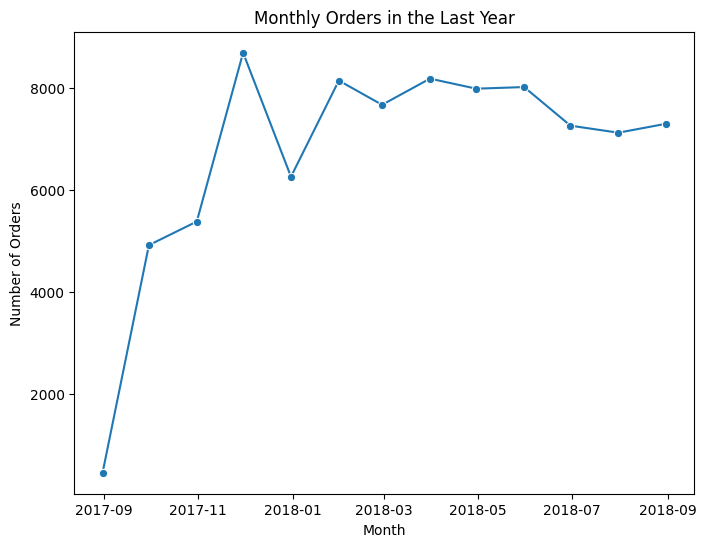

In [ ]:
# Menghitung jumlah order per bulan
monthly_orders = filtered_dataset.resample('M', on='order_purchase_timestamp').size()

# Visualisasi jumlah order per bulan
plt.figure(figsize=(8, 6))
sns.lineplot(x=monthly_orders.index, y=monthly_orders.values, marker='o')
plt.title('Monthly Orders in the Last Year')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.show()

Total order cenderung mengalami kenaikan dari bulan ke bulan selama satu tahun terakhir. Namun jumlah order sempat mengalami penurunan yang cukup signifikan pada bulan Januari 2018, tetapi kembali stabil pada bulan berikutnya.

Pada bulan Desember 2017 merupakan puncak dari total order paling tinggi selama satu tahun terakhir, mengingat bahwa pada akhir tahun biasanya terdapat promo year end sale, ini akan menjadi momentum tepat untuk menaikkan sales.

#### **10 Kota dengan total order terbanyak selama 1 tahun terakhir**

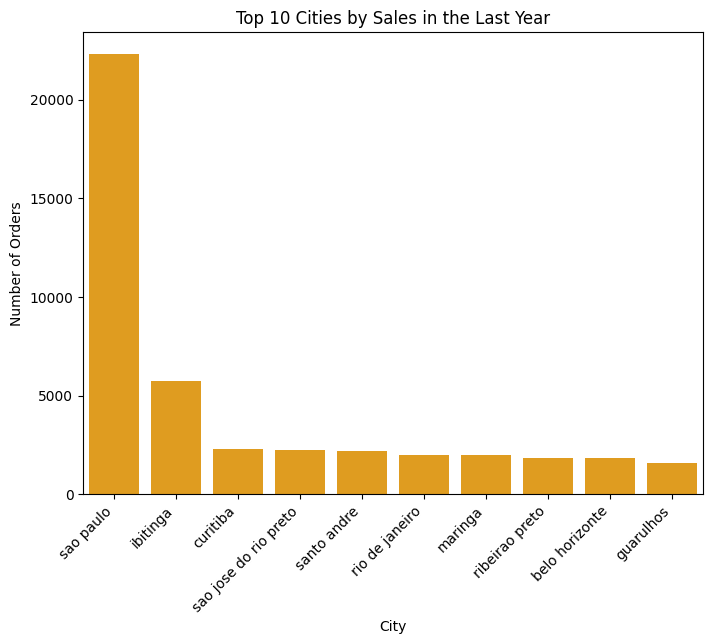

In [ ]:
# Menghitung jumlah penjualan per kota
city_sales = filtered_dataset.groupby('seller_city').size().sort_values(ascending=False).head(10)

# Visualisasi penjualan per kota untuk 10 kota teratas
plt.figure(figsize=(8, 6))
sns.barplot(x=city_sales.index, y=city_sales.values, color='orange')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Cities by Sales in the Last Year')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.show()

Kota Sao Paulo menjadi kota dengan total order tertinggi sebanyak lebih dari 20000 orders. Perbedaan jumlah order Sao Paulo dengan yang lain begitu signifikan, tetapi kota ke-3 sampai ke-10 menurut total order tidak menunjukkan perbedaan signifikan.

#### **10 kategori produk paling banyak diorder selama 1 tahun terakhir**

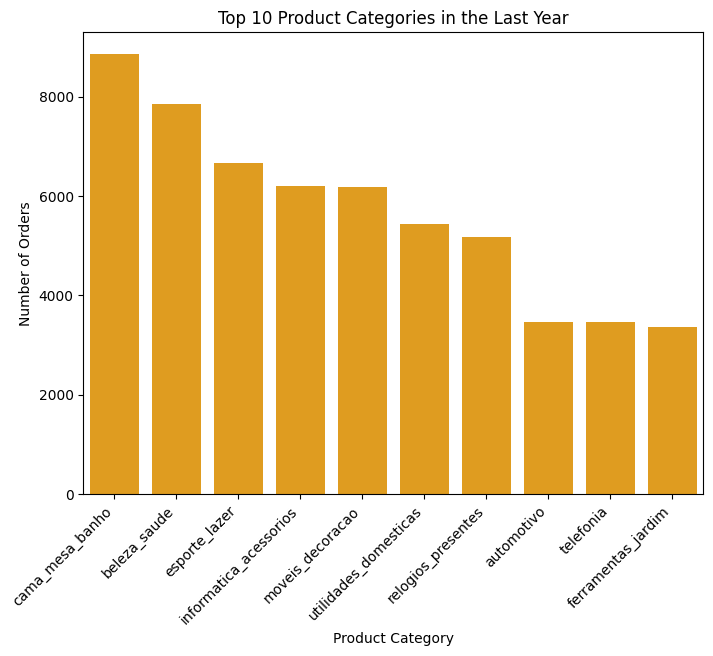

In [ ]:
# Menghitung jumlah produk terjual untuk setiap kategori
top_categories = filtered_dataset['product_category_name'].value_counts().head(10)

# Visualisasi top 10 kategori produk
plt.figure(figsize=(8, 6))
sns.barplot(x=top_categories.index, y=top_categories.values, color='orange')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Product Categories in the Last Year')
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')
plt.show()

Cama mesa banho menjadi kategori produk yang paling banyak dibeli oleh pelanggan.

#### **10 kategori produk paling sedikit diorder selama 1 tahun terakhir**

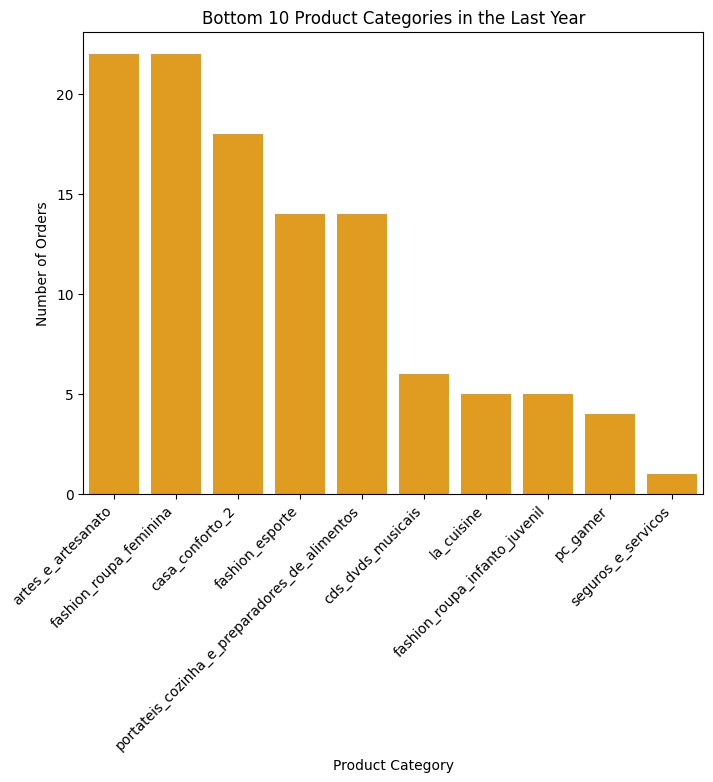

In [ ]:
# Filter data satu tahun terakhir
one_year_ago = dataset['order_purchase_timestamp'].max() - pd.DateOffset(years=1)
filtered_dataset = dataset[dataset['order_purchase_timestamp'] >= one_year_ago]

# Menghitung jumlah produk terjual untuk setiap kategori
top_categories = filtered_dataset['product_category_name'].value_counts().tail(10)

# Visualisasi top 10 kategori produk
plt.figure(figsize=(8, 6))
sns.barplot(x=top_categories.index, y=top_categories.values, color='orange')
plt.xticks(rotation=45, ha='right')
plt.title('Bottom 10 Product Categories in the Last Year')
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')
plt.show()

Seguros e servicos menjadi kategori produk yang paling sedikit dibeli oleh pelanggan.

#### **Distribusi reviews dari top 10 kategori produk paling banyak diorder**

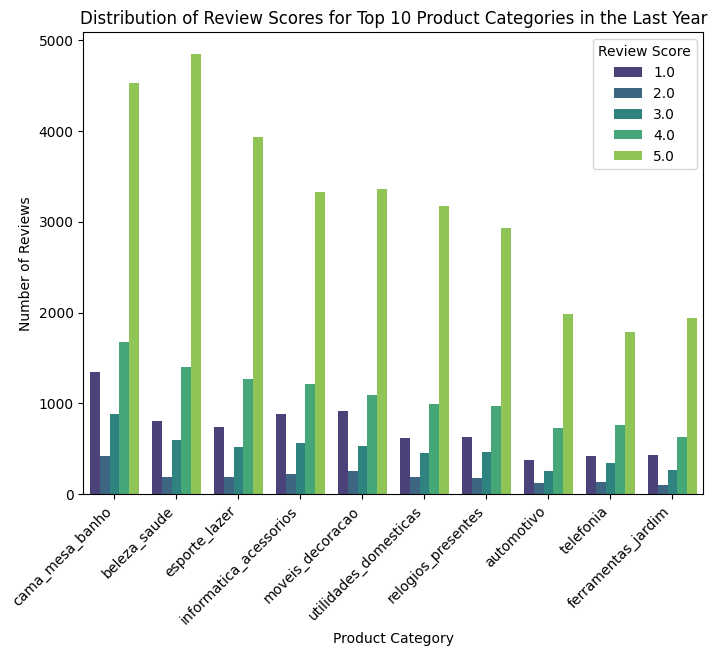

In [ ]:
# Menghitung jumlah produk terjual untuk setiap kategori
top_categories = filtered_dataset['product_category_name'].value_counts().head(10).index

# Filter dataset untuk hanya mencakup kesepuluh kategori teratas
filtered_dataset_top_categories = filtered_dataset[filtered_dataset['product_category_name'].isin(top_categories)]

# Menghitung jumlah review untuk setiap kategori dan mengurutkannya
sorted_categories = filtered_dataset_top_categories['product_category_name'].value_counts().index

# Visualisasi distribusi skor review untuk masing-masing kategori
plt.figure(figsize=(8, 6))
sns.countplot(x='product_category_name', hue='review_score', data=filtered_dataset_top_categories, order=sorted_categories, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Review Scores for Top 10 Product Categories in the Last Year')
plt.xlabel('Product Category')
plt.ylabel('Number of Reviews')
plt.legend(title='Review Score')
plt.show()

Mayoritas pelanggan memberikan review score 5 untuk kesepuluh 10 product category yang paling banyak terjual.

#### **Distribusi reviews dari top 10 kategori produk paling sedikit diorder**

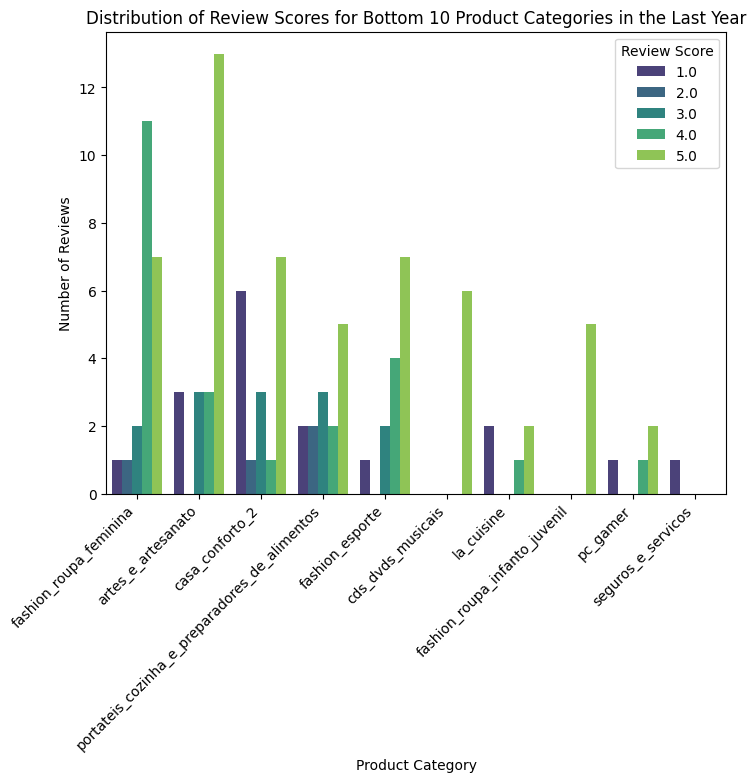

In [ ]:
# Menghitung jumlah produk terjual untuk setiap kategori
top_categories = filtered_dataset['product_category_name'].value_counts().tail(10).index

# Filter dataset untuk hanya mencakup kesepuluh kategori teratas
filtered_dataset_top_categories = filtered_dataset[filtered_dataset['product_category_name'].isin(top_categories)]

# Menghitung jumlah review untuk setiap kategori dan mengurutkannya
sorted_categories = filtered_dataset_top_categories['product_category_name'].value_counts().index

# Visualisasi distribusi skor review untuk masing-masing kategori
plt.figure(figsize=(8, 6))
sns.countplot(x='product_category_name', hue='review_score', data=filtered_dataset_top_categories, order=sorted_categories, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Review Scores for Bottom 10 Product Categories in the Last Year')
plt.xlabel('Product Category')
plt.ylabel('Number of Reviews')
plt.legend(title='Review Score')
plt.show()

Mayoritas pelanggan memberikan score review 5 untuk kesepuluh 10 product category yang paling sedikit terjual, hanya saja untuk kategori fashion roupa femininina didominasi oleh review score 4.

### **Bagaimana lama waktu pengiriman yang dibutuhkan sampai dengan produk diterima customer selama setahun terakhir?**

#### **Distribusi lama waktu pengiriman**

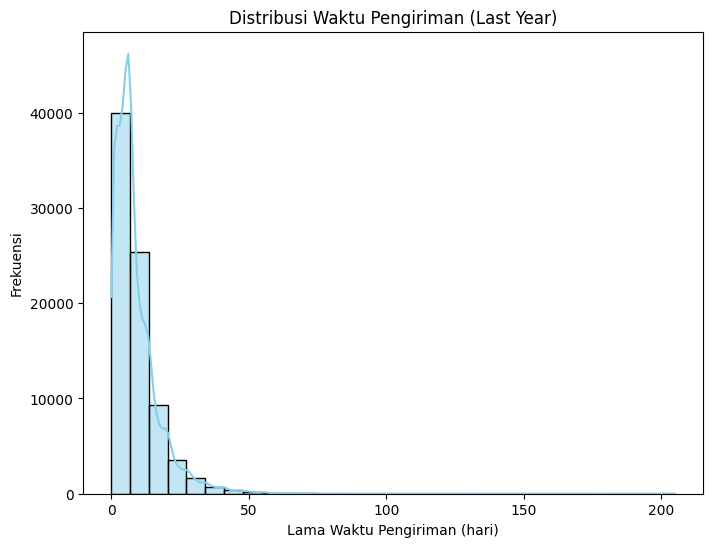

In [ ]:
# Filter data satu tahun terakhir
one_year_ago = dataset['order_delivered_customer_date'].max() - pd.DateOffset(years=1)
filtered_dataset = dataset[(dataset['order_delivered_customer_date'] >= one_year_ago) & (dataset['order_delivered_customer_date'] <= dataset['order_delivered_customer_date'].max())].copy()

# Menghitung lamanya waktu pengiriman
filtered_dataset['delivery_time'] = (filtered_dataset['order_delivered_customer_date'] - filtered_dataset['order_delivered_carrier_date']).dt.days

# Visualisasi distribusi waktu pengiriman
plt.figure(figsize=(8, 6))
sns.histplot(filtered_dataset['delivery_time'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Waktu Pengiriman (Last Year)')
plt.xlabel('Lama Waktu Pengiriman (hari)')
plt.ylabel('Frekuensi')
plt.show()

Mayoritas pesanan dikirim dalam kurun waktu lama pengiriman yang wajar dan normal, yaitu 0 sampai dengan 15 hari.

#### **Rata-rata lama pengiriman per bulan**

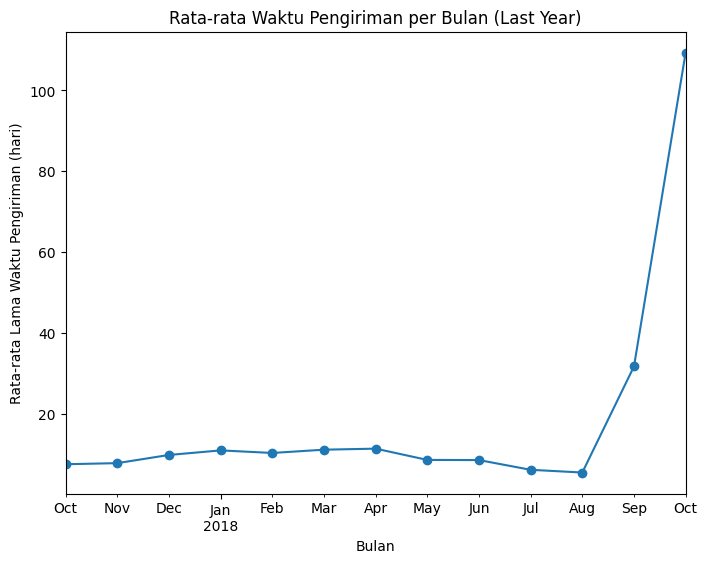

In [ ]:
# Identifikasi apakah ada peningkatan waktu pengiriman pada waktu tertentu
# Menghitung rata-rata waktu pengiriman per bulan
filtered_dataset['delivery_month'] = filtered_dataset['order_delivered_customer_date'].dt.to_period('M')
avg_delivery_time_per_month = filtered_dataset.groupby('delivery_month')['delivery_time'].mean()

# Visualisasi rata-rata waktu pengiriman per bulan
plt.figure(figsize=(8, 6))
avg_delivery_time_per_month.plot(marker='o')
plt.title('Rata-rata Waktu Pengiriman per Bulan (Last Year)')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Lama Waktu Pengiriman (hari)')
plt.show()

Terdapat kenaikan rata-rata lama pengiriman yang begitu signifikan pada bulan September dan Oktober 2018. Padahal pada bulan Juli 2017 sampai dengan Agustus 2018, rata-rata lama pengiriman masih di bawah 20 hari.

## **Conclusion**

- Selama satu tahun terakhir, total orger mengalami peningkatan pesat pada 3 bulan pertama, tetapi kemudian mengalami stagnansi bahkan juga penurunan walau tidak begitu signifikan. Rata-rata produk yang diorder selama setahun terakhir memperoleh review score lebih dari atau sama dengan 4.
- Mayoritas produk yang diorder dikirim dalam kurun waktu 0-15 hari, tetapi pada bulan September dan Oktober rata-rata lama waktu pengiriman justru semakin lama--bahkan mencapai 40-100 hari.

## **RFM Analysis**

In [ ]:
# Membuat DataFrame RFM
rfm_df = dataset.groupby(by="customer_id", as_index=False).agg({
    "order_delivered_customer_date": "max",  # mengambil tanggal order terakhir
    "order_id": "nunique",
    "payment_value": "sum"
})

# Mengganti nama kolom
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# Menambah kolom recency
current_date = pd.to_datetime('2023-12-17')  # Tanggal analisis
rfm_df['recency'] = (current_date - rfm_df['max_order_timestamp']).dt.days

# Menampilkan beberapa baris awal dari DataFrame RFM
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-28 15:41:30,1,114.74,2209
1,000161a058600d5901f007fab4c27140,2017-07-25 18:57:33,1,67.41,2335
2,0001fd6190edaaf884bcaf3d49edf079,2017-03-06 08:57:49,1,195.42,2476
3,0002414f95344307404f0ace7a26f1d5,2017-09-13 20:06:02,1,179.35,2285
4,000379cdec625522490c315e70c7a9fb,2018-04-13 20:21:08,1,107.01,2073


In [ ]:
# Menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = dataset["order_delivered_customer_date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

# Menampilkan beberapa baris awal dari DataFrame RFM
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-28,1,114.74,323
1,000161a058600d5901f007fab4c27140,2017-07-25,1,67.41,449
2,0001fd6190edaaf884bcaf3d49edf079,2017-03-06,1,195.42,590
3,0002414f95344307404f0ace7a26f1d5,2017-09-13,1,179.35,399
4,000379cdec625522490c315e70c7a9fb,2018-04-13,1,107.01,187


In [ ]:
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,323
1,000161a058600d5901f007fab4c27140,1,67.41,449
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,590
3,0002414f95344307404f0ace7a26f1d5,1,179.35,399
4,000379cdec625522490c315e70c7a9fb,1,107.01,187


In [ ]:
rfm_df.describe()

,frequency,monetary,recency
count,94490.0,94490.000000,94490.000000
mean,1.0,205.581187,275.301418
std,0.0,609.832685,152.184964
min,1.0,9.590000,0.000000
25%,1.0,62.880000,154.000000
50%,1.0,109.720000,254.000000
75%,1.0,196.360000,386.000000
max,1.0,109312.640000,736.000000


In [ ]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,customer_id,frequency,monetary,recency
1243,033fab69968b0d69099d64423831a236,1,44.63,0
14722,27ae7c8a8fc20ce80d96f01b6f19961b,1,201.96,6
58540,9e83d47684eb1a58b1c31830f5de10ac,1,101.36,15
94361,ffa87b4246c4848711afb512bd51f161,1,265.94,20
7364,1409b2945191b7aff1975ba2ce9918c5,1,65.35,22


In [ ]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,323
62990,aa5f8aa4c21fe89a04e8d221d4cd8ac1,1,44.28,51
62999,aa669113d84e54772dcff82d3dd74177,1,212.02,326
62998,aa664b5b74721f18d25d5c15b68b5093,1,38.78,442
62997,aa649379e102c4a9ac069e4b0a71fd0e,1,222.76,228


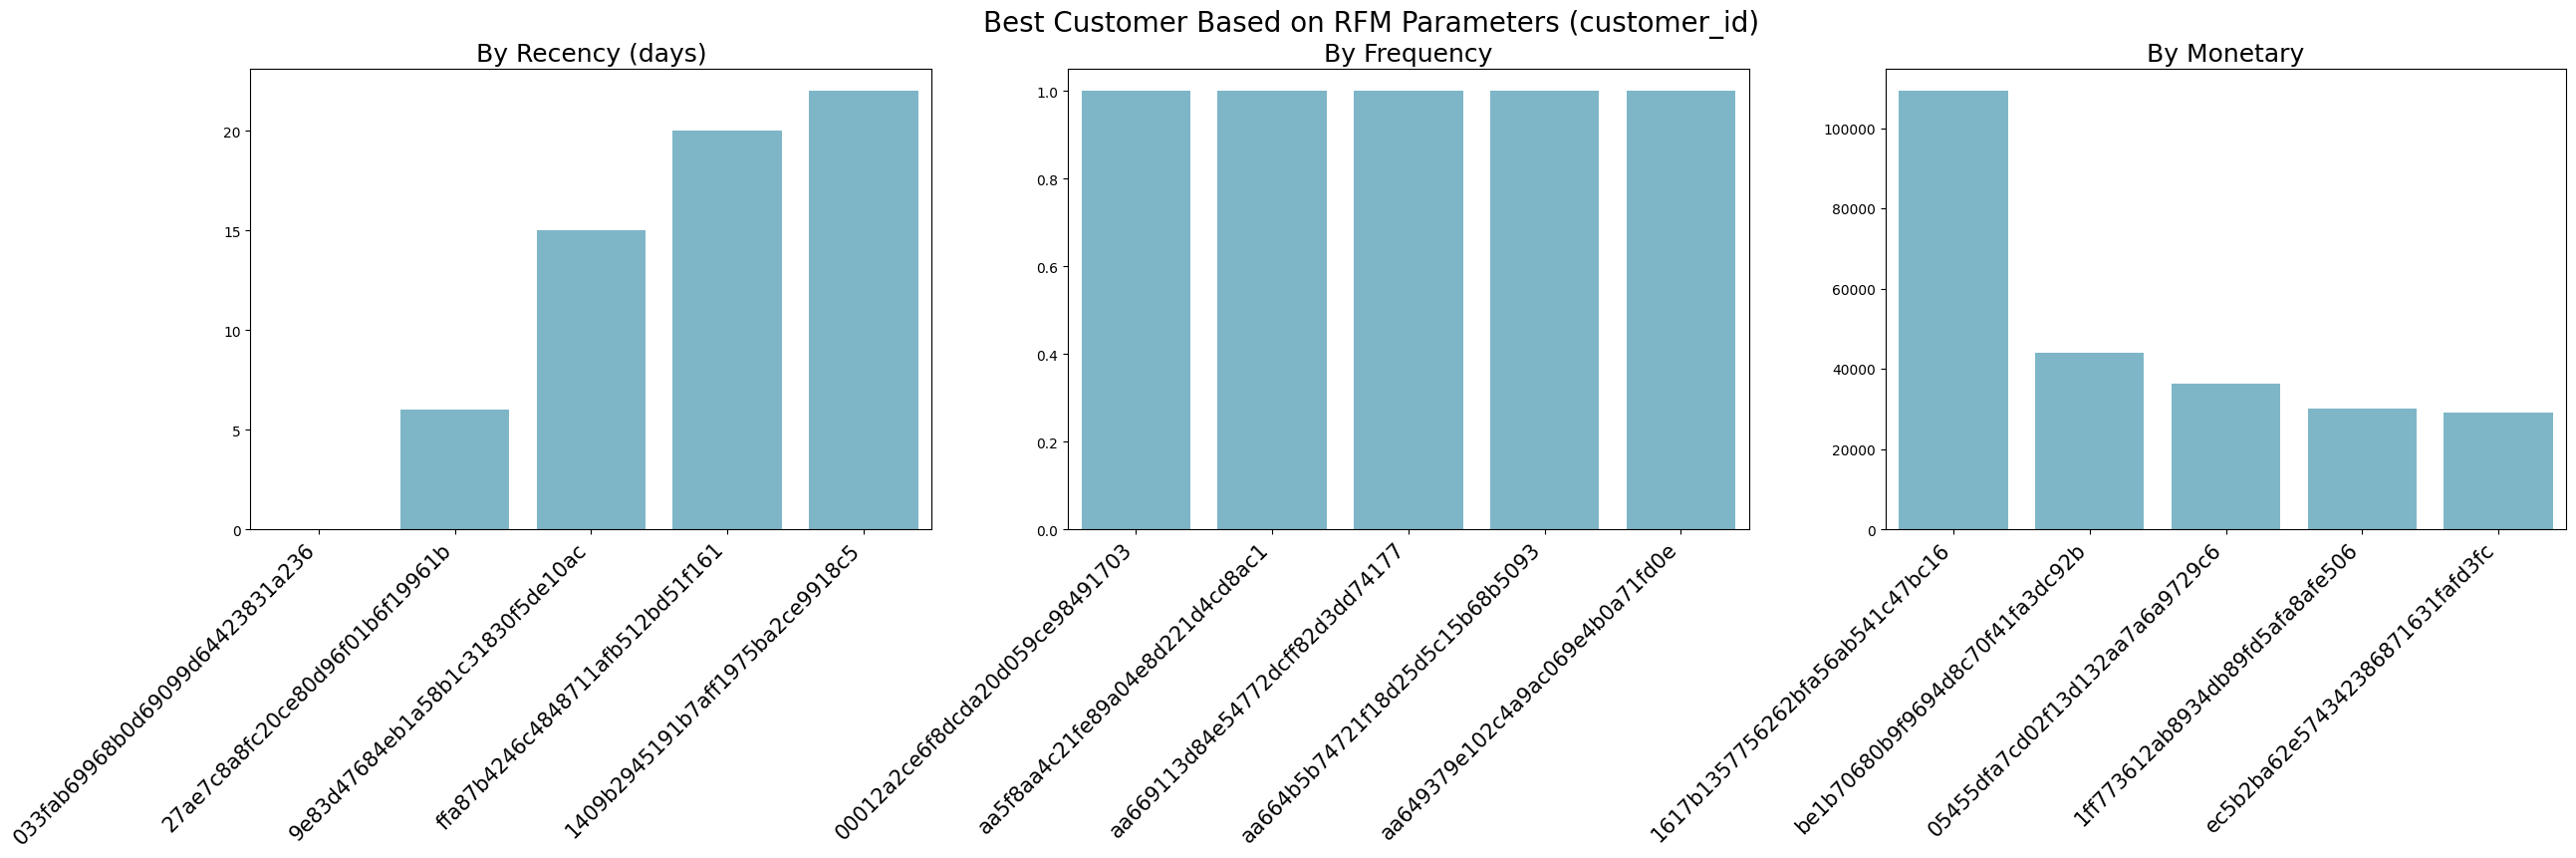

In [ ]:
# Mengganti nama kolom yang sesuai dengan dataset yang kita punya
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# Visualisasi berdasarkan Recency
sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')

# Visualisasi berdasarkan Frequency
sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')

# Visualisasi berdasarkan Monetary
sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45, ha='right')

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

#### **Mengurutkan customer berdasarkan recency, frequency, & monetary score**

In [ ]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,323,32516.0,47245.5,49138.0
1,000161a058600d5901f007fab4c27140,1,67.41,449,15197.5,47245.5,26679.0
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,590,2126.0,47245.5,70673.5
3,0002414f95344307404f0ace7a26f1d5,1,179.35,399,21758.5,47245.5,67790.0
4,000379cdec625522490c315e70c7a9fb,1,107.01,187,62489.0,47245.5,46207.5


In [ ]:
# normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100

rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,323,34.412107,100.0,52.003387
1,000161a058600d5901f007fab4c27140,1,67.41,449,16.083713,100.0,28.234734
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,590,2.249974,100.0,74.794687
3,0002414f95344307404f0ace7a26f1d5,1,179.35,399,23.027304,100.0,71.743042
4,000379cdec625522490c315e70c7a9fb,1,107.01,187,66.132924,100.0,48.902000


In [ ]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_id', 'RFM_score']].head(7)

,customer_id,RFM_score
0,00012a2ce6f8dcda20d059ce98491703,3.14
1,000161a058600d5901f007fab4c27140,2.33
2,0001fd6190edaaf884bcaf3d49edf079,3.55
3,0002414f95344307404f0ace7a26f1d5,3.62
4,000379cdec625522490c315e70c7a9fb,3.29
5,0004164d20a9e969af783496f3408652,2.33
6,000419c5494106c306a97b5635748086,2.37


#### **Segmentasi customer berdasarkan RFM_score**

In [ ]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['customer_id', 'RFM_score', 'customer_segment']].head(20)

,customer_id,RFM_score,customer_segment
0,00012a2ce6f8dcda20d059ce98491703,3.14,Medium value customer
1,000161a058600d5901f007fab4c27140,2.33,Low value customers
2,0001fd6190edaaf884bcaf3d49edf079,3.55,Medium value customer
3,0002414f95344307404f0ace7a26f1d5,3.62,Medium value customer
4,000379cdec625522490c315e70c7a9fb,3.29,Medium value customer
5,0004164d20a9e969af783496f3408652,2.33,Low value customers
6,000419c5494106c306a97b5635748086,2.37,Low value customers
7,00046a560d407e99b969756e0b10f282,3.67,Medium value customer
8,00050bf6e01e69d5c0fd612f1bcfb69c,2.69,Low value customers
9,000598caf2ef4117407665ac33275130,4.93,Top customers


In [ ]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_df

,customer_segment,customer_id
0,High value customer,15266
1,Low value customers,39755
2,Medium value customer,33023
3,Top customers,5411
4,lost customers,1035


In [ ]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

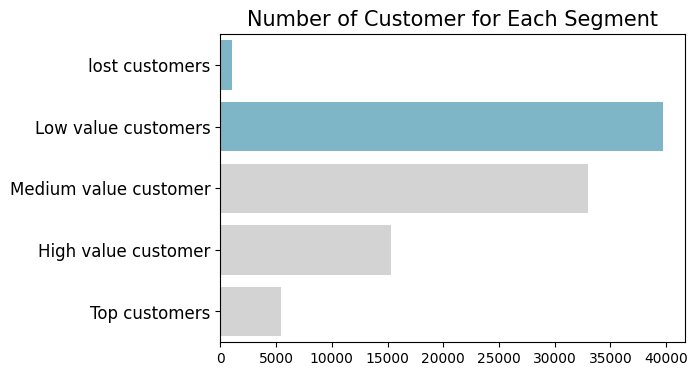

In [ ]:
plt.figure(figsize=(6, 4))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_id",
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()